In [ ]:
import time
import flappy_bird_gym
env = flappy_bird_gym.make("FlappyBird-v0")

In [121]:
def run(fps=None):
    obs = env.reset()
    freq = 5
    counter = 0
    while True:
        counter += 1
        # Next action:
        # (feed the observation to your agent here)
        action = 0
        # env.action_space.sample() for a random action # 0 = nothing, 1 = flap
        if obs[0] < 0.2:
            if obs[1] < -.05:
                action = 1
        else:
            if obs[1] < -0.03:
                action = 1

        # Processing:
        obs_old = obs
        obs, reward, done, info = env.step(action)
        v_y = obs[1]-obs_old[1]
        #print(obs)

        # Rendering the game:
        # (remove this two lines during training)
        #env.render()
        if fps is not None:
            time.sleep(1 / fps)  # FPS

        # Checking if the player is still alive
        if done:
            env.close()
            return info


In [111]:
l = [run()['score'] for i in range(1000)]

In [114]:
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [123]:
l2 = [run(fps=600)['score'] for i in tqdm(range(50))]

  0%|          | 0/50 [00:00<?, ?it/s]

In [117]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

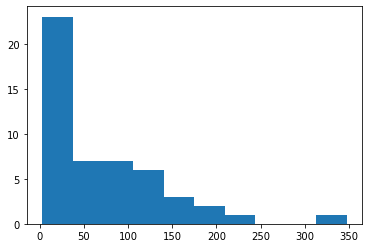

In [125]:
plt.hist(l2, bins=10);

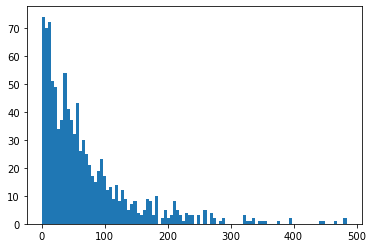

In [120]:
plt.hist(l, bins=100);